# LASSO回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model.base import LinearRegression
from sklearn.metrics.scorer import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing.data import PolynomialFeatures
from sklearn.preprocessing.data import StandardScaler
from sklearn.model_selection._split import train_test_split

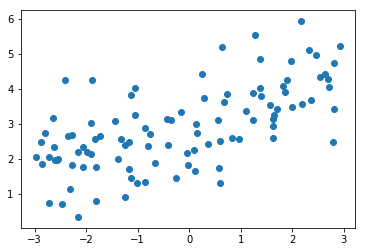

In [2]:
np.random.seed(42)
x = np.random.uniform(-3., 3. , size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)
plt.scatter(x,y)
plt.show()

In [3]:
def PolynomialRegression(degree):
    return Pipeline(
        [
            ('poly', PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('lin_reg',LinearRegression())
        ]
    )

In [4]:
# 把数据集分为训练集和测试集
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [5]:

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
# 可以看到均方误差会很大
mean_squared_error(y_test, y_poly_predict)

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


167.94010863221607

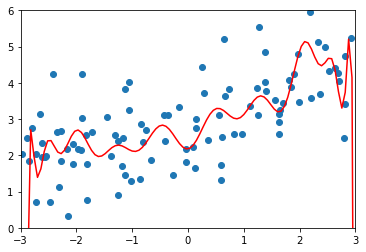

In [7]:
# 把拟合的曲线画出来
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3,3,0,6])
plt.show()

In [8]:
# 把画图抽出来作为一个方法
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)

    plt.scatter(x,y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3,3,0,6])
    plt.show()

## 使用LASSO回归应对过拟合

In [9]:
from sklearn.linear_model.coordinate_descent import Lasso

# 封装一个使用LASSO回归的管道
def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lasso_reg',Lasso(alpha=alpha))
    ])

### α取0.01

In [10]:
# 使用Lasso回归后的（对测试集的）均方误差是多少呢？
lasso1_reg =LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.1496080843259964

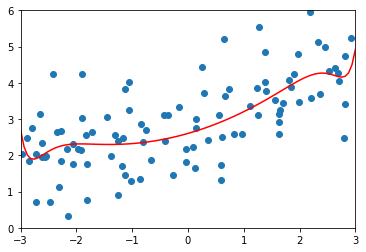

In [11]:
plot_model(lasso1_reg)

### α取0.1

In [12]:
lasso2_reg =LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1213911351818648

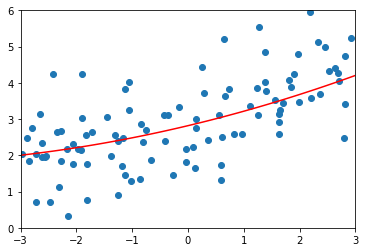

In [13]:
plot_model(lasso2_reg)

已经接近是一条直线了

### α取1

In [14]:
lasso3_reg =LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)

y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.8408939659515595

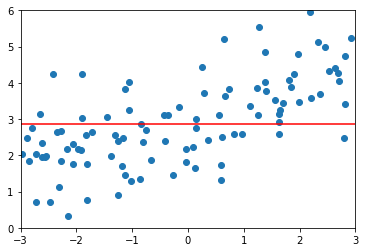

In [15]:
plot_model(lasso3_reg)

已经相当接近是一条平行的直线了